#### Análise dos dados da COVID-19
#### 🔍 Exploratory Data Analysis (EDA)
- Limpeza e tratamento de dados.
- Análise de tendências globais e locais.
- Comparações regionais e setoriais.

#### 📈 Visualizações
- **Gráficos de Barras**: Estados brasileiros com mais casos e mortes acumuladas.
- **Gráficos de Linhas**: Evolução de casos, mortes e vacinação ao longo do tempo.
- **Gráficos de Dispersão**: Relação entre vacinação e redução de casos.
- **Mapas Interativos**: Distribuição de casos e vacinação global.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
import pandas as pd

df_covid = pd.read_csv('data_root/owid-covid-data.csv')

- Como foi a evolução mundial da COVID-19?

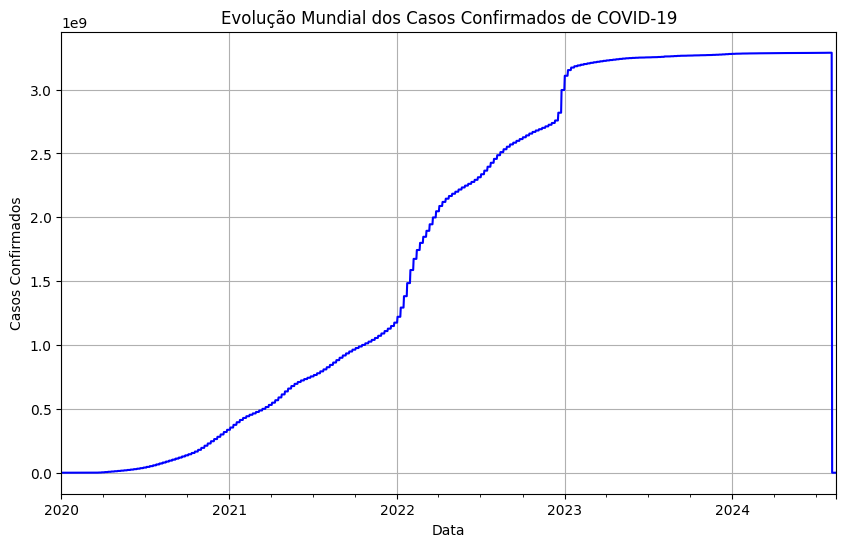

In [2]:
# Converter a coluna 'date' para datetime
df_covid['date'] = pd.to_datetime(df_covid['date'])

# Agrupar por data e somar os casos confirmados
global_cases = df_covid.groupby('date')['total_cases'].sum()

# Plotar a evolução dos casos confirmados mundialmente
plt.figure(figsize=(10,6))
global_cases.plot(kind='line', color='blue')
plt.title('Evolução Mundial dos Casos Confirmados de COVID-19')
plt.ylabel('Casos Confirmados')
plt.xlabel('Data')
plt.grid(True)
plt.show()


- Quais são os 5 países com mais casos e mortes acumulados?

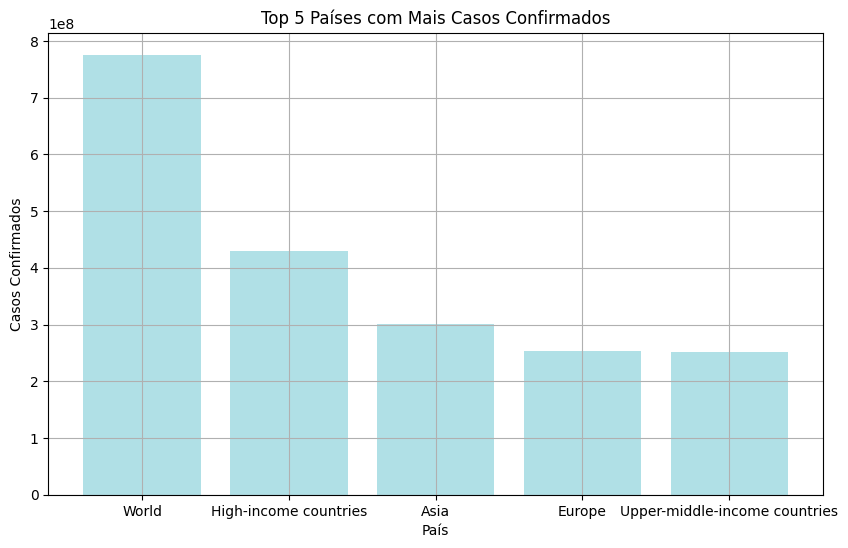

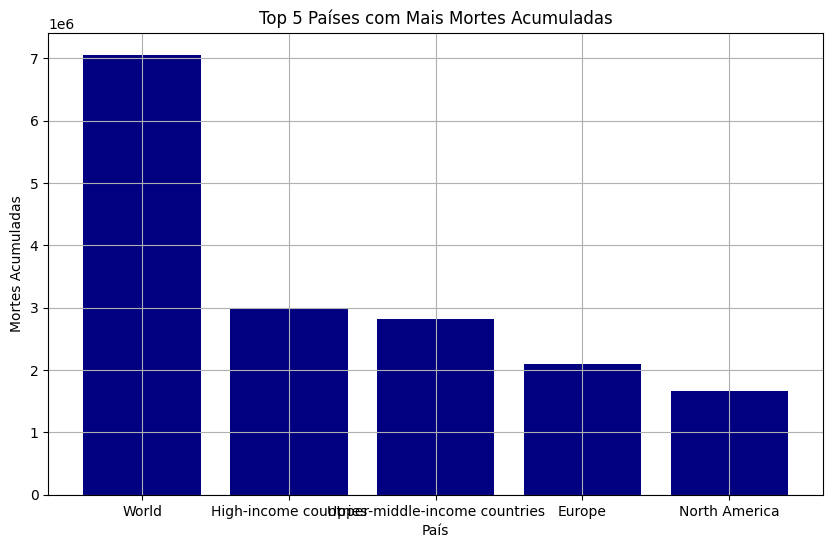

In [3]:
# Agrupar por país e somar casos e mortes
country_stats = df_covid.groupby('location').agg({'total_cases': 'max', 'total_deaths': 'max'}).reset_index()

# Ordenar pelos 5 países com mais casos confirmados
top_5_cases = country_stats.sort_values(by='total_cases', ascending=False).head(5)

# Ordenar pelos 5 países com mais mortes acumuladas
top_5_deaths = country_stats.sort_values(by='total_deaths', ascending=False).head(5)

# Plotar os gráficos de barras
plt.figure(figsize=(10,6))
plt.bar(top_5_cases['location'], top_5_cases['total_cases'], color='powderblue')
plt.title('Top 5 Países com Mais Casos Confirmados')
plt.ylabel('Casos Confirmados')
plt.xlabel('País')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(top_5_deaths['location'], top_5_deaths['total_deaths'], color='navy')
plt.title('Top 5 Países com Mais Mortes Acumuladas')
plt.ylabel('Mortes Acumuladas')
plt.xlabel('País')
plt.grid(True)
plt.show()

- Quais são os 5 países mais avançados em relação à vacinação da população?

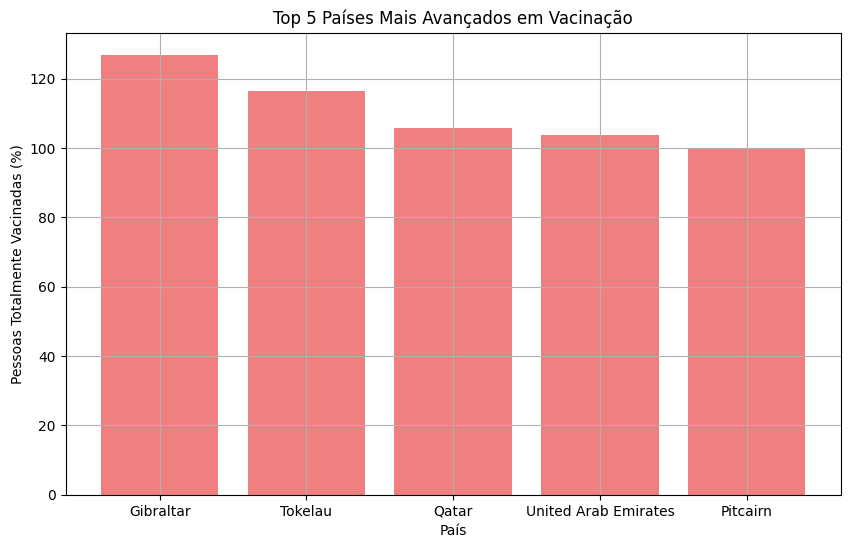

In [4]:
# Agrupar por país e pegar o último valor de pessoas totalmente vacinadas por 100 habitantes
vaccination_stats = df_covid.groupby('location')['people_fully_vaccinated_per_hundred'].max().reset_index()

# Top 5 países mais avançados em vacinação
top_5_vaccination = vaccination_stats.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(5)

# Gráfico de barras para os 5 países mais avançados na vacinação
plt.figure(figsize=(10,6))
plt.bar(top_5_vaccination['location'], top_5_vaccination['people_fully_vaccinated_per_hundred'], color='lightcoral')
plt.title('Top 5 Países Mais Avançados em Vacinação')
plt.ylabel('Pessoas Totalmente Vacinadas (%)')
plt.xlabel('País')
plt.grid(True)
plt.show()


- Como está a evolução de casos e mortes no Brasil em comparação com o mundo?

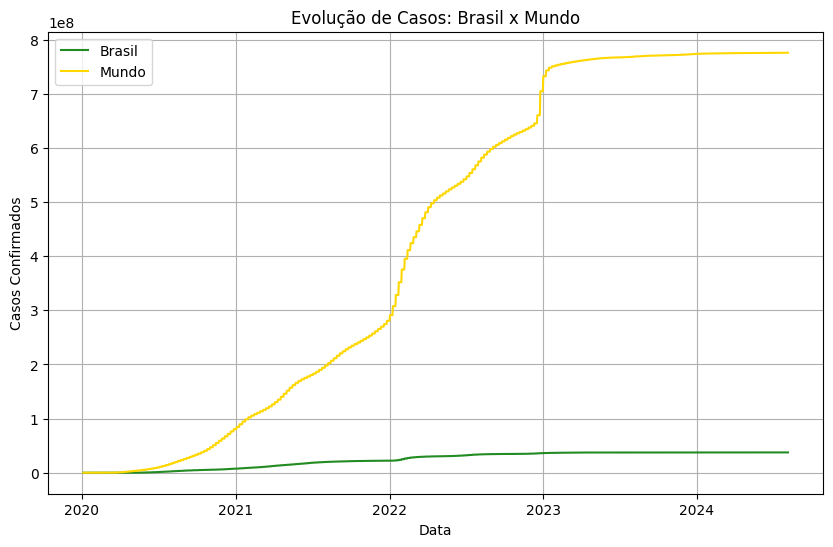

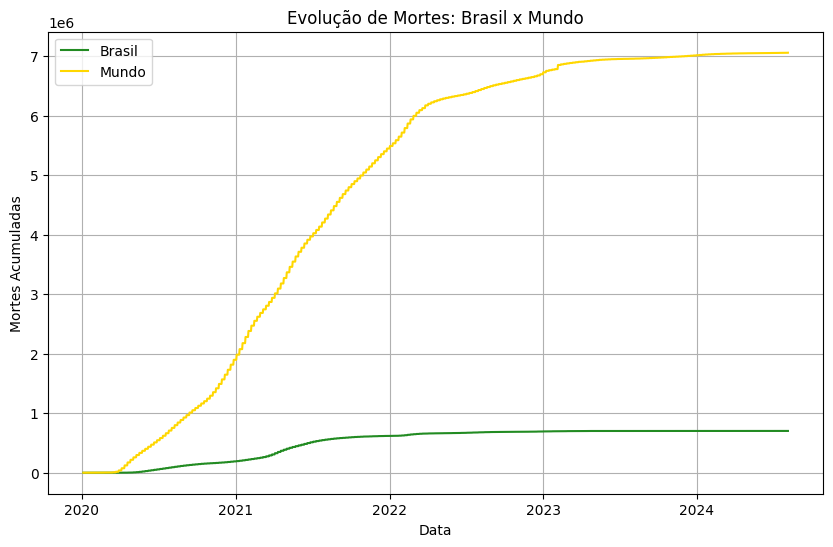

In [5]:
# Filtrar dados do Brasil
brasil_data = df_covid[df_covid['location'] == 'Brazil'].groupby('date').agg({'total_cases': 'max', 'total_deaths': 'max'})

# Evolução global 
world_data = df_covid[df_covid['location'] == 'World'].groupby('date').agg({'total_cases': 'max', 'total_deaths': 'max'})

# Comparar a evolução de casos
plt.figure(figsize=(10,6))
plt.plot(brasil_data.index, brasil_data['total_cases'], label='Brasil', color='forestgreen')
plt.plot(world_data.index, world_data['total_cases'], label='Mundo', color='gold')
plt.title('Evolução de Casos: Brasil x Mundo')
plt.ylabel('Casos Confirmados')
plt.xlabel('Data')
plt.legend()
plt.grid(True)
plt.show()

# Comparar a evolução de mortes
plt.figure(figsize=(10,6))
plt.plot(brasil_data.index, brasil_data['total_deaths'], label='Brasil', color='forestgreen')
plt.plot(world_data.index, world_data['total_deaths'], label='Mundo', color='gold')
plt.title('Evolução de Mortes: Brasil x Mundo')
plt.ylabel('Mortes Acumuladas')
plt.xlabel('Data')
plt.legend()
plt.grid(True)
plt.show()

- Quais são os 5 estados brasileiros com mais casos e mortes acumuladas?

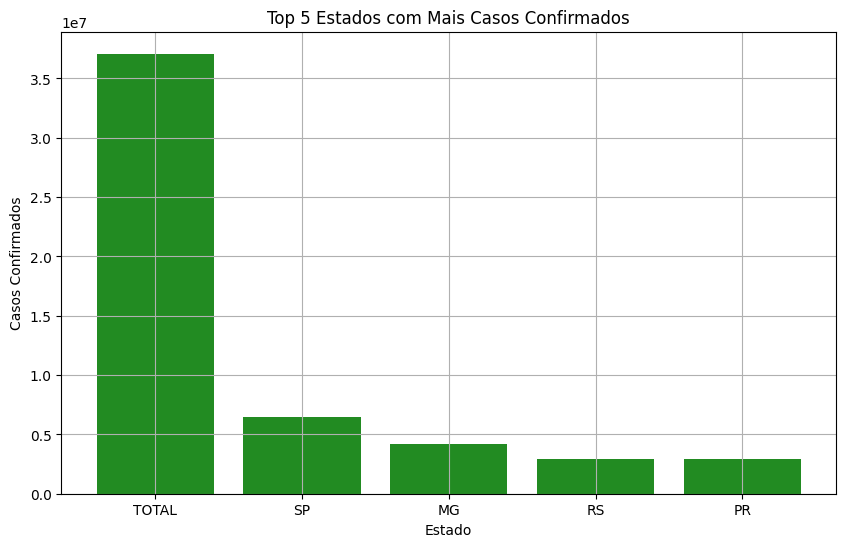

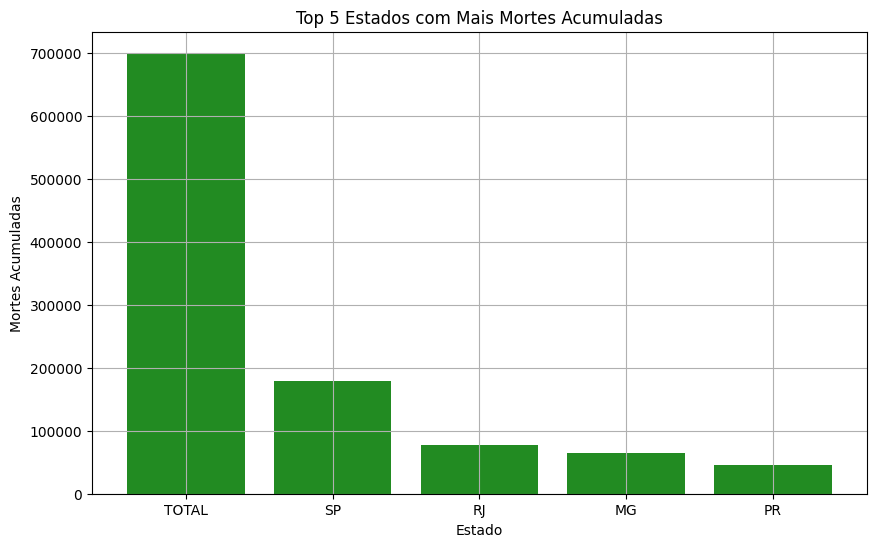

In [7]:
df_brasil = pd.read_csv('data_root/cases-brazil-states.csv')

# Agrupar por estado e pegar o valor mais recente de total de casos e mortes
br_estados = df_brasil.groupby('state').agg({'totalCases': 'max', 'deaths': 'max'}).reset_index()

# Top 5 estados com mais casos confirmados
top_5_estados_casos = br_estados.sort_values(by='totalCases', ascending=False).head(5)

# Top 5 estados com mais mortes acumuladas
top_5_estados_mortes = br_estados.sort_values(by='deaths', ascending=False).head(5)

# Gráfico de barras para casos
plt.figure(figsize=(10,6))
plt.bar(top_5_estados_casos['state'], top_5_estados_casos['totalCases'], color='forestgreen')
plt.title('Top 5 Estados com Mais Casos Confirmados')
plt.ylabel('Casos Confirmados')
plt.xlabel('Estado')
plt.grid(True)
plt.show()

# Gráfico de barras para mortes
plt.figure(figsize=(10,6))
plt.bar(top_5_estados_mortes['state'], top_5_estados_mortes['deaths'], color='forestgreen')
plt.title('Top 5 Estados com Mais Mortes Acumuladas')
plt.ylabel('Mortes Acumuladas')
plt.xlabel('Estado')
plt.grid(True)
plt.show()

#### Exploração de diferentes tipos de gráficos:
- Justifique a utilização de cada gráfico.
- Pelo menos duas perguntas devem testar diferentes tipos de gráficos para a mesma análise (por exemplo, comparar gráficos de linha com gráficos de barras). Explicar como a escolha do tipo de gráfico influencia a interpretação dos dados e se há algum tipo de visualização que seja mais adequado para responder à pergunta proposta.

#### 1. Gráfico de Barras para os 5 Estados com Mais Casos e Mortes Acumuladas

Gráficos de barras são otimos para comparações diretas entre categorias, como os estados brasileiros. Eles facilitam a visualização, permitindo que você rapidamente identifique quais são os estados com mais casos ou mortes. Cada barra representa um estado e a altura das barras deixa super claro quem está no topo da lista.

#### 2. Gráfico de Linha para a Evolução de Casos e Mortes ao Longo do Tempo

Gráficos de linha são ótimos para mostrar como algo muda ao longo do tempo. No caso da pandemia, ele nos ajuda a entender como os casos e mortes foram aumentando (ou diminuindo) a cada dia. A linha contínua te dá uma visão fluida da situação, e você consegue perceber facilmente onde houve picos ou quedas.
Por que funciona? Ele nos permite ver claramente as tendências, como momentos em que houve um aumento súbito nos casos ou quando a situação começou a melhorar.

#### 3. Comparação de Gráficos de Barras e Linhas para Analisar a Vacinação

Gráfico de Barras: Usamos para comparar a porcentagem de vacinação entre os estados. É uma maneira rápida de ver quem está mais avançado na vacinação, com barras que representam visualmente o percentual de pessoas vacinadas em cada estado.

Gráfico de Linhas: Quando queremos ver como a vacinação foi progredindo ao longo do tempo, o gráfico de linha entra em cena. Ele te mostra a evolução, com subidas e descidas, permitindo identificar momentos de aceleração ou desaceleração.

#### Conclusão
A escolha do gráfico faz toda a diferença na maneira como interpretamos os dados. Para comparar grupos, como os estados, as barras são as mais indicadas, mas para observar a evolução de algo ao longo do tempo, as linhas são mais apropriadas. Usar os dois tipos para diferentes análises nos dá uma visão completa e rica da situação!